Global Power Plant Project - Primary Fuel and Capacity Prediction

Since, this is both a Classification as well as Regression project, we import libraries accordingly.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

Import Dataset from GitHub

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we can begin analysing our dataset:

- Check shape
- General Info
- Stats
- Null Values
- Duplicates

In [3]:
df.shape

(907, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df['country'].unique()

array(['IND'], dtype=object)

We can note 2 things:
- We have a lot of rows and even columns with null values, which need to be removed or treated.
- There is only 1 country on our database - India, meaning we can further remove some columns as they are of no use to us.

In [6]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

- I will be dropping the columns which have no or all unique categorical values as they are of no use in our prediction.
- I will also drop the columns which have less than half the data for object type and more than 500 null values in float data type

In [8]:
drop_columns = ['country','country_long','name','gppd_idnr','other_fuel1','other_fuel2','other_fuel3','owner','url','source','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2019','generation_data_source','estimated_generation_gwh']

In [9]:
df = df.drop(columns = drop_columns, axis=1)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            907 non-null    float64
 1   latitude               861 non-null    float64
 2   longitude              861 non-null    float64
 3   primary_fuel           907 non-null    object 
 4   commissioning_year     527 non-null    float64
 5   geolocation_source     888 non-null    object 
 6   year_of_capacity_data  519 non-null    float64
 7   generation_gwh_2015    422 non-null    float64
 8   generation_gwh_2016    434 non-null    float64
 9   generation_gwh_2017    440 non-null    float64
 10  generation_gwh_2018    448 non-null    float64
dtypes: float64(9), object(2)
memory usage: 78.1+ KB


On the remaining null values present, i will be using One Hot Encoding on the Object dtype and Iterative Imputer on the float dtype.

In [11]:
df1 = pd.get_dummies(df[['geolocation_source']])
df = df.join(df1)
df = df.drop(columns = ['geolocation_source'],axis = 1)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN,0,1,0
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,135.0,23.8712,91.3602,Gas,2004.0,2019.0,843.747000,886.004428,663.774500,626.239128,0,0,1
4,1800.0,21.9603,82.4091,Coal,2015.0,2019.0,5916.370000,6243.000000,5385.579736,7279.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,2019.0,0.994875,233.596650,865.400000,686.500000,0,0,1
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [13]:
ii = IterativeImputer()

In [14]:
iter_col = pd.DataFrame(ii.fit_transform(df[['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]),
                        columns = ['latitude1','longitude1','commissioning_year1','year_of_capacity_data1','generation_gwh_20151','generation_gwh_20161','generation_gwh_20171','generation_gwh_20181'])

df = df.join(iter_col)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,...,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,latitude1,longitude1,commissioning_year1,year_of_capacity_data1,generation_gwh_20151,generation_gwh_20161,generation_gwh_20171,generation_gwh_20181
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN,...,1,0,28.1839,73.2407,2011.000000,2019.0,2300.308088,2390.478431,2501.406819,2600.044086
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,24.7663,74.6090,1997.089457,2019.0,2311.469640,2393.503765,2498.555257,2595.494542
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,21.9038,69.3732,1997.087155,2019.0,2312.333625,2393.790953,2498.056728,2595.220704
3,135.0,23.8712,91.3602,Gas,2004.0,2019.0,843.747000,886.004428,663.774500,626.239128,...,0,1,23.8712,91.3602,2004.000000,2019.0,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,2019.0,5916.370000,6243.000000,5385.579736,7279.000000,...,0,1,21.9603,82.4091,2015.000000,2019.0,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,2019.0,0.994875,233.596650,865.400000,686.500000,...,0,1,16.2949,77.3568,2016.000000,2019.0,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,12.8932,78.1654,1997.090077,2019.0,2308.795984,2392.035251,2496.471872,2594.093513
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,15.2758,75.5811,1997.089200,2019.0,2309.795649,2392.526801,2496.891103,2594.394290
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,24.3500,73.7477,1997.089082,2019.0,2311.620012,2393.556039,2498.482816,2595.455765


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   capacity_mw                                              907 non-null    float64
 1   latitude                                                 861 non-null    float64
 2   longitude                                                861 non-null    float64
 3   primary_fuel                                             907 non-null    object 
 4   commissioning_year                                       527 non-null    float64
 5   year_of_capacity_data                                    519 non-null    float64
 6   generation_gwh_2015                                      422 non-null    float64
 7   generation_gwh_2016                                      434 non-null    float64
 8   generation_gwh_2017           

In [16]:
null_columns = ['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
df = df.drop(columns = null_columns,axis = 1)
df

,capacity_mw,primary_fuel,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,latitude1,longitude1,commissioning_year1,year_of_capacity_data1,generation_gwh_20151,generation_gwh_20161,generation_gwh_20171,generation_gwh_20181
0,2.5,Solar,0,1,0,28.1839,73.2407,2011.000000,2019.0,2300.308088,2390.478431,2501.406819,2600.044086
1,98.0,Coal,0,0,1,24.7663,74.6090,1997.089457,2019.0,2311.469640,2393.503765,2498.555257,2595.494542
2,39.2,Wind,0,0,1,21.9038,69.3732,1997.087155,2019.0,2312.333625,2393.790953,2498.056728,2595.220704
3,135.0,Gas,0,0,1,23.8712,91.3602,2004.000000,2019.0,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,0,0,1,21.9603,82.4091,2015.000000,2019.0,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,0,0,1,16.2949,77.3568,2016.000000,2019.0,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,1,0,0,12.8932,78.1654,1997.090077,2019.0,2308.795984,2392.035251,2496.471872,2594.093513
904,25.5,Wind,0,0,1,15.2758,75.5811,1997.089200,2019.0,2309.795649,2392.526801,2496.891103,2594.394290
905,80.0,Coal,0,0,1,24.3500,73.7477,1997.089082,2019.0,2311.620012,2393.556039,2498.482816,2595.455765


In [17]:
df = df.drop_duplicates()
df.shape

(906, 13)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lab = LabelEncoder()

In [20]:
df['primary_fuel'] = lab.fit_transform(df['primary_fuel'])
df

,capacity_mw,primary_fuel,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,latitude1,longitude1,commissioning_year1,year_of_capacity_data1,generation_gwh_20151,generation_gwh_20161,generation_gwh_20171,generation_gwh_20181
0,2.5,6,0,1,0,28.1839,73.2407,2011.000000,2019.0,2300.308088,2390.478431,2501.406819,2600.044086
1,98.0,1,0,0,1,24.7663,74.6090,1997.089457,2019.0,2311.469640,2393.503765,2498.555257,2595.494542
2,39.2,7,0,0,1,21.9038,69.3732,1997.087155,2019.0,2312.333625,2393.790953,2498.056728,2595.220704
3,135.0,2,0,0,1,23.8712,91.3602,2004.000000,2019.0,843.747000,886.004428,663.774500,626.239128
4,1800.0,1,0,0,1,21.9603,82.4091,2015.000000,2019.0,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,1,0,0,1,16.2949,77.3568,2016.000000,2019.0,0.994875,233.596650,865.400000,686.500000
903,3.0,6,1,0,0,12.8932,78.1654,1997.090077,2019.0,2308.795984,2392.035251,2496.471872,2594.093513
904,25.5,7,0,0,1,15.2758,75.5811,1997.089200,2019.0,2309.795649,2392.526801,2496.891103,2594.394290
905,80.0,1,0,0,1,24.3500,73.7477,1997.089082,2019.0,2311.620012,2393.556039,2498.482816,2595.455765


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 906
Data columns (total 13 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   capacity_mw                                              906 non-null    float64
 1   primary_fuel                                             906 non-null    int32  
 2   geolocation_source_Industry About                        906 non-null    uint8  
 3   geolocation_source_National Renewable Energy Laboratory  906 non-null    uint8  
 4   geolocation_source_WRI                                   906 non-null    uint8  
 5   latitude1                                                906 non-null    float64
 6   longitude1                                               906 non-null    float64
 7   commissioning_year1                                      906 non-null    float64
 8   year_of_capacity_data1        

In [22]:
df.describe()

,capacity_mw,primary_fuel,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,latitude1,longitude1,commissioning_year1,year_of_capacity_data1,generation_gwh_20151,generation_gwh_20161,generation_gwh_20171,generation_gwh_20181
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.0,906.000000,906.000000,906.000000,906.000000
mean,326.558991,3.201987,0.131347,0.004415,0.844371,21.195048,77.464897,1997.090362,2019.0,2310.223285,2392.874157,2497.927577,2595.054463
std,590.324956,2.278421,0.337966,0.066335,0.362704,6.082600,4.815068,13.023550,0.0,2892.717738,2893.904598,2933.297374,3033.519679
min,0.000000,0.000000,0.000000,0.000000,0.000000,8.168900,68.644700,1927.000000,2019.0,-391.751321,-4.900490,0.000000,0.000000
25%,16.612500,1.000000,0.000000,0.000000,1.000000,17.065350,74.387550,1997.086993,2019.0,661.304737,700.213837,803.549562,808.107795
50%,59.600000,3.000000,0.000000,0.000000,1.000000,21.307900,76.978950,1997.089529,2019.0,2309.911335,2392.691723,2497.253105,2594.593567
75%,386.625000,6.000000,0.000000,0.000000,1.000000,25.178075,79.207350,2003.000000,2019.0,2312.418009,2393.951613,2498.820498,2595.685406
max,4760.000000,7.000000,1.000000,1.000000,1.000000,34.649000,95.408000,2018.000000,2019.0,30539.000000,30015.000000,35116.000000,35136.000000


Now that we have treated and cleaned our dataset, let's begin visualizing our data

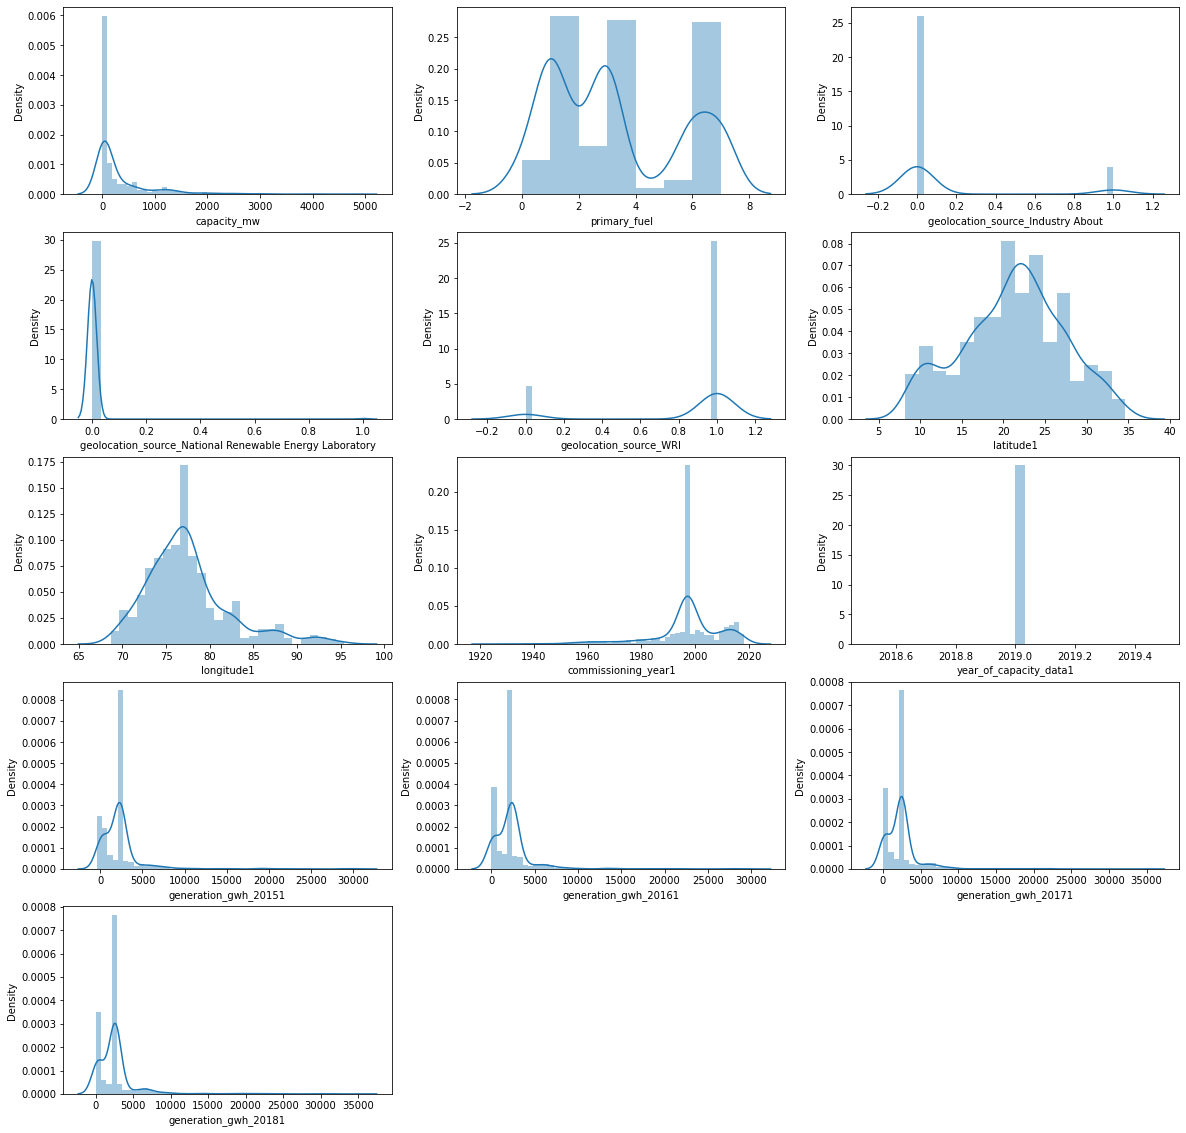

In [23]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

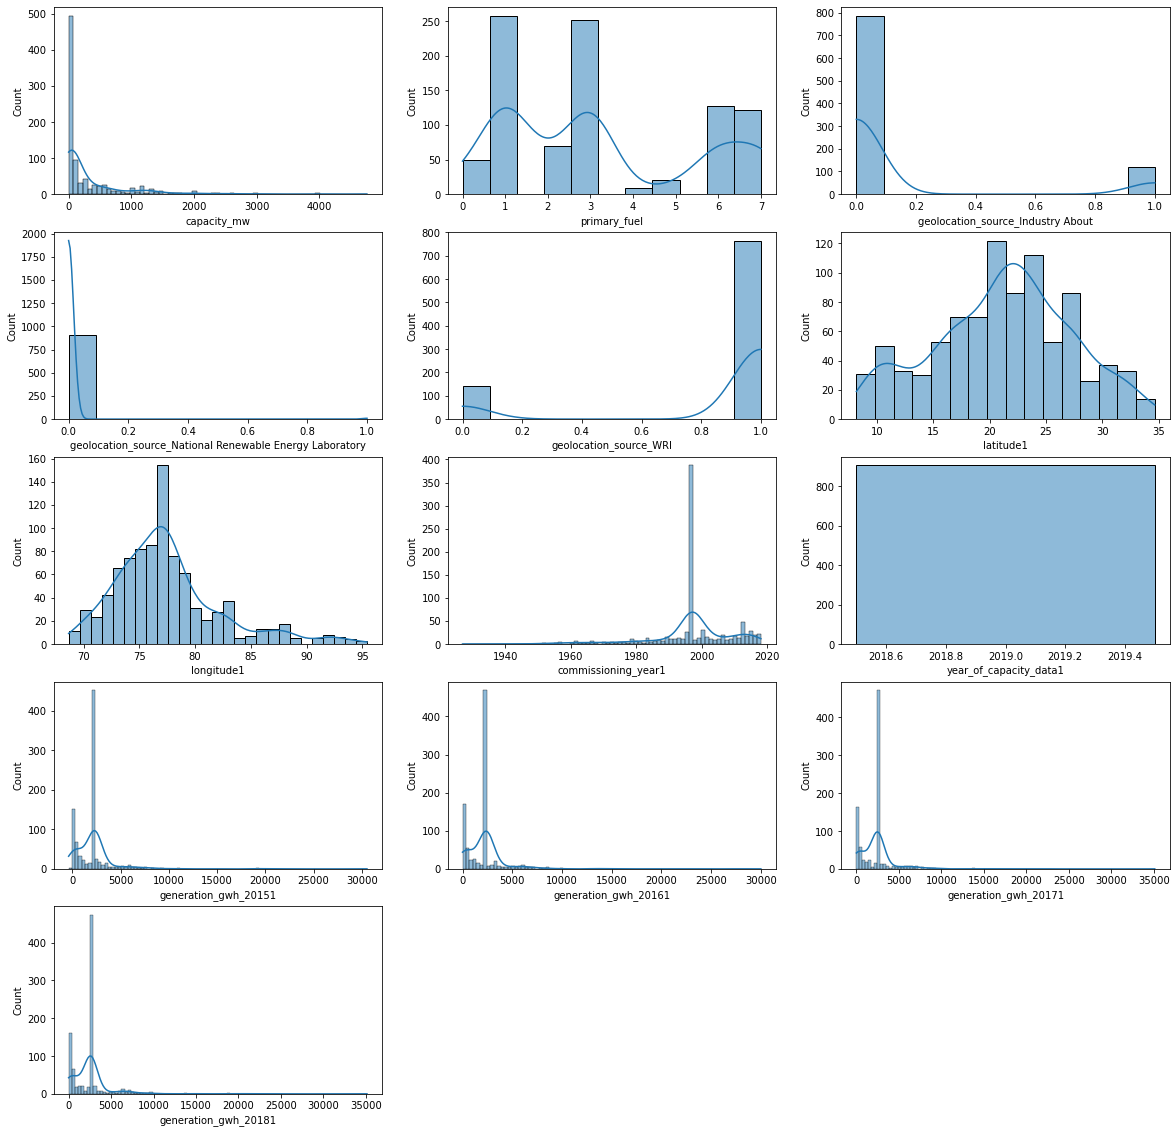

In [24]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(x=column,data=df,kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

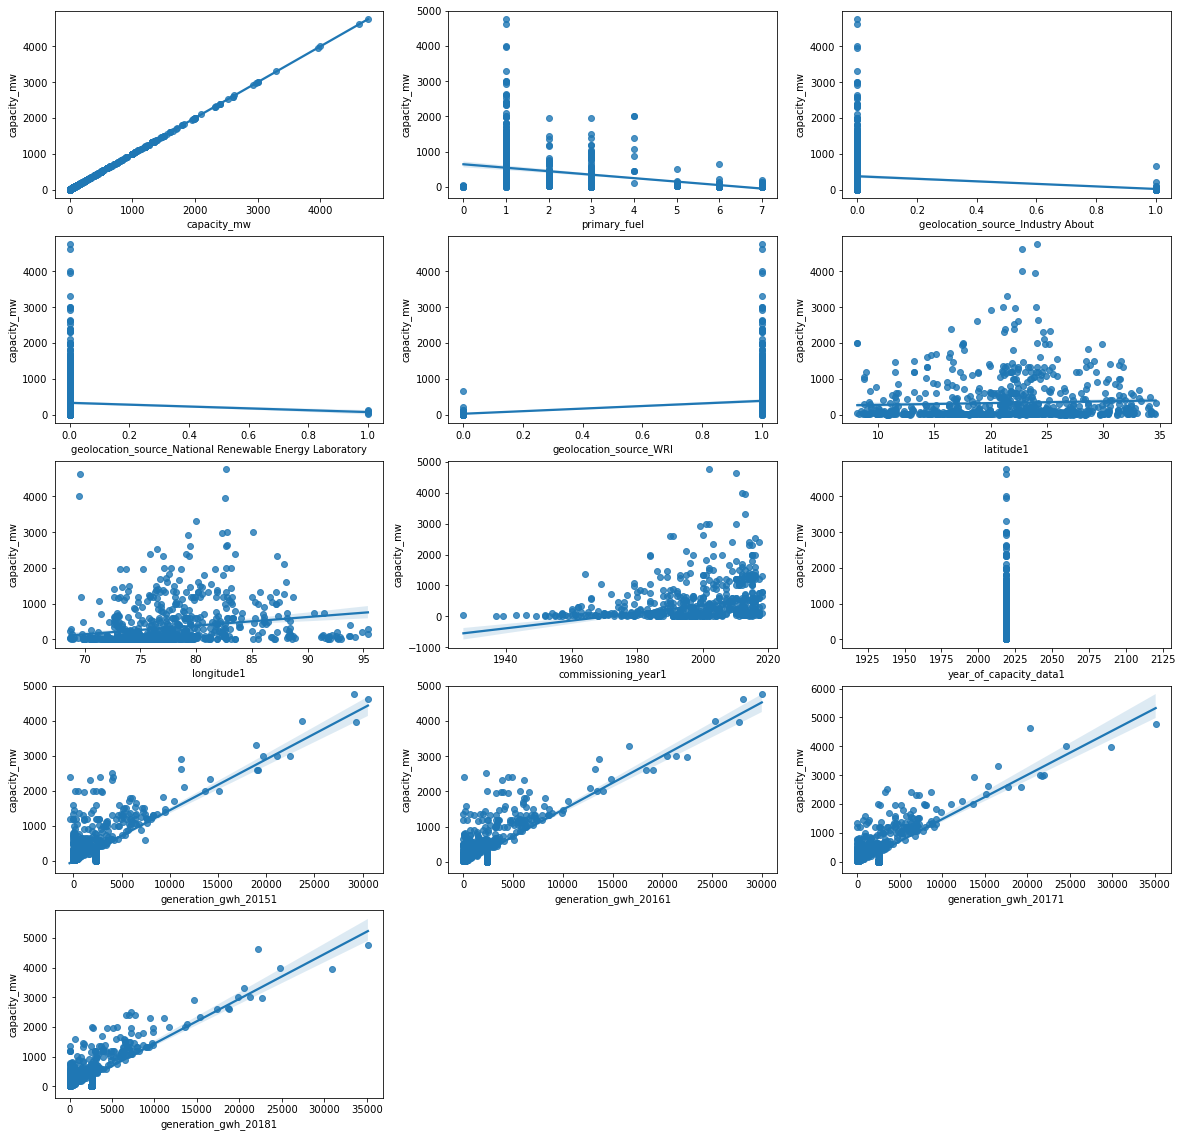

In [25]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.regplot(x=column,y='capacity_mw',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

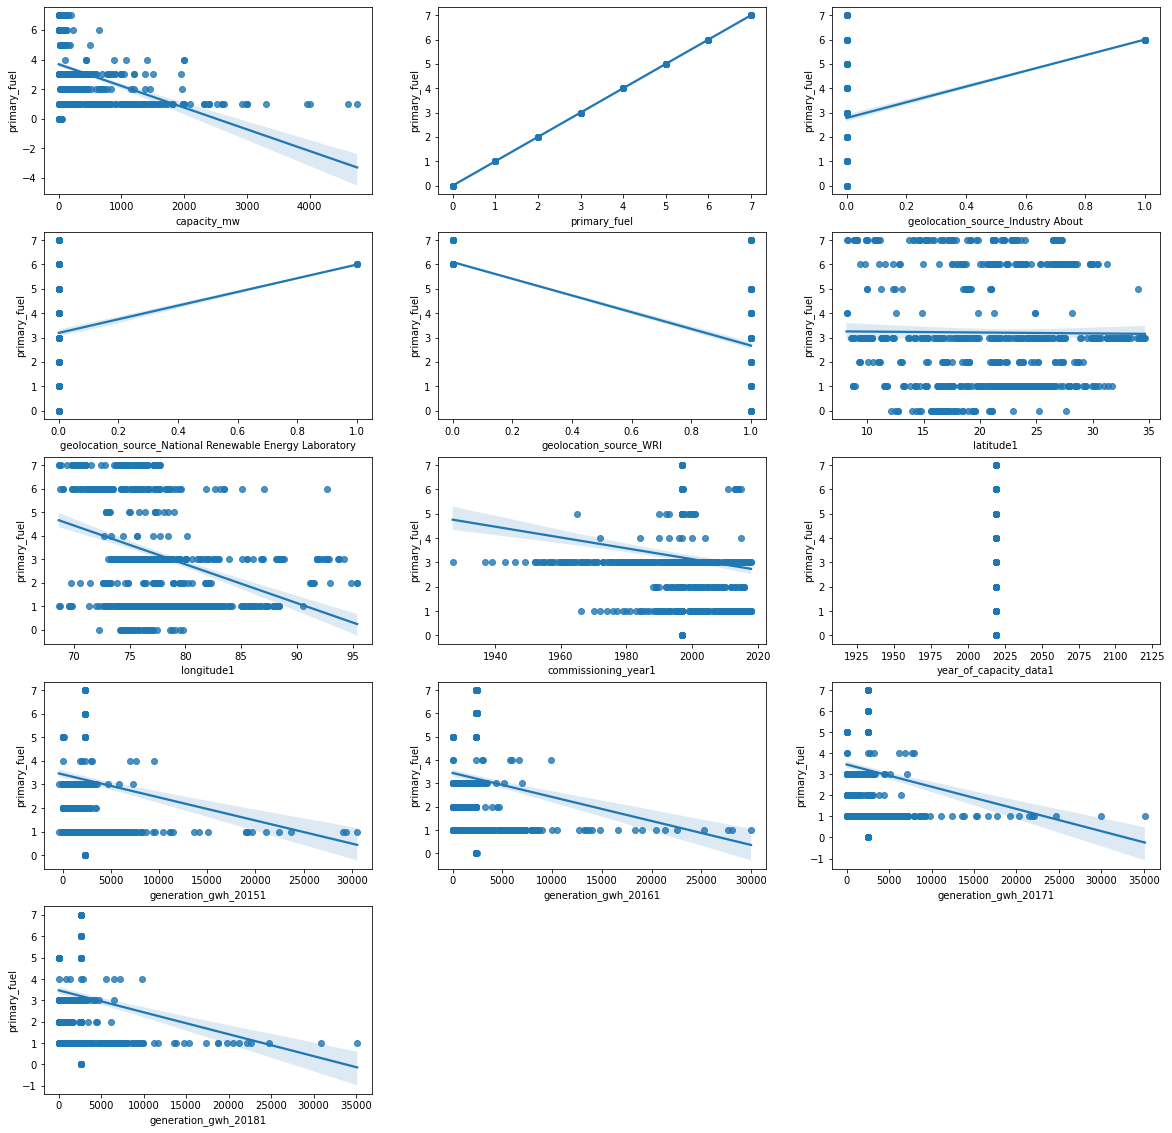

In [26]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.regplot(x=column,y='primary_fuel',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

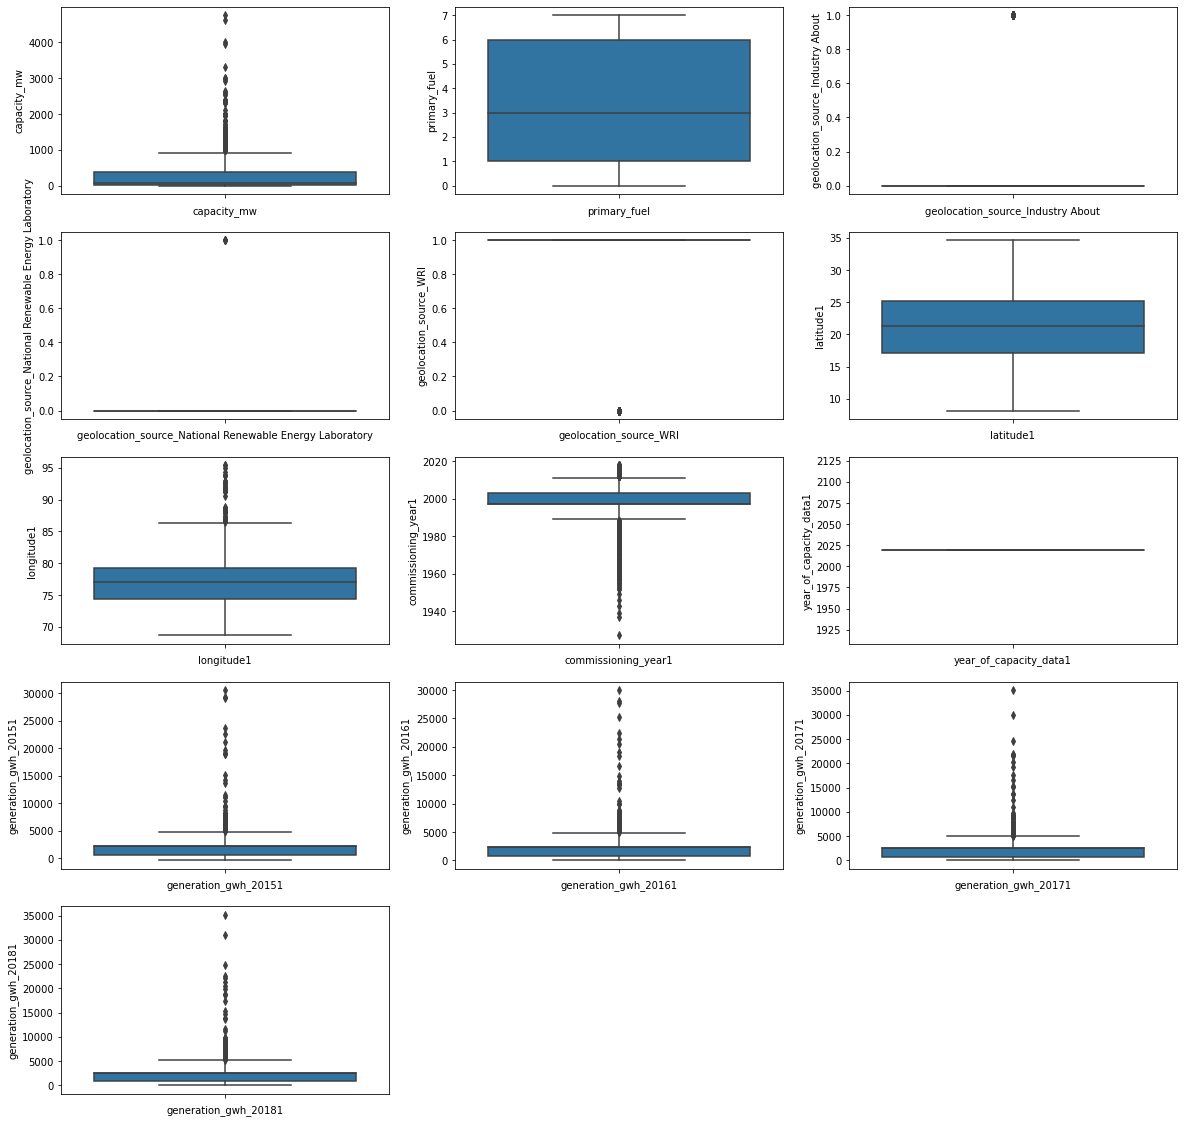

In [27]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We can see, we have a lot of outliers in our data that need to be removed.

In [28]:
from scipy import stats

In [29]:
from scipy.stats import zscore

z_score = zscore(df[['capacity_mw','commissioning_year1','generation_gwh_20151','generation_gwh_20161','generation_gwh_20171','generation_gwh_20181']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(865, 13)

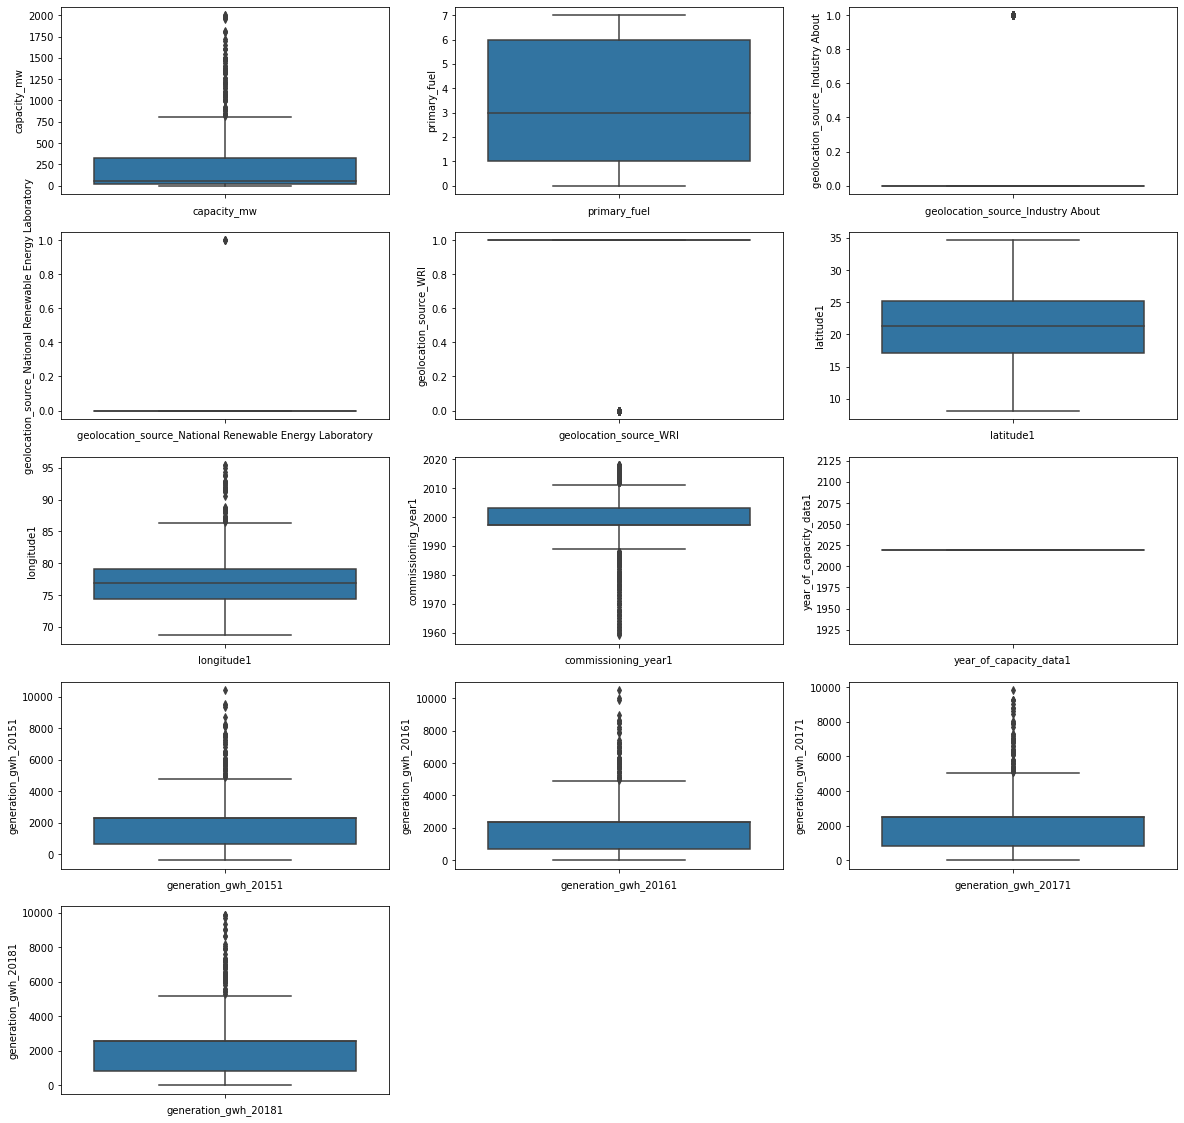

In [30]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We can see decrease in outliers, I will not be removing them further to maintain >90% of our original dataset

Let's check the heatmap for any multi-collinearity problems

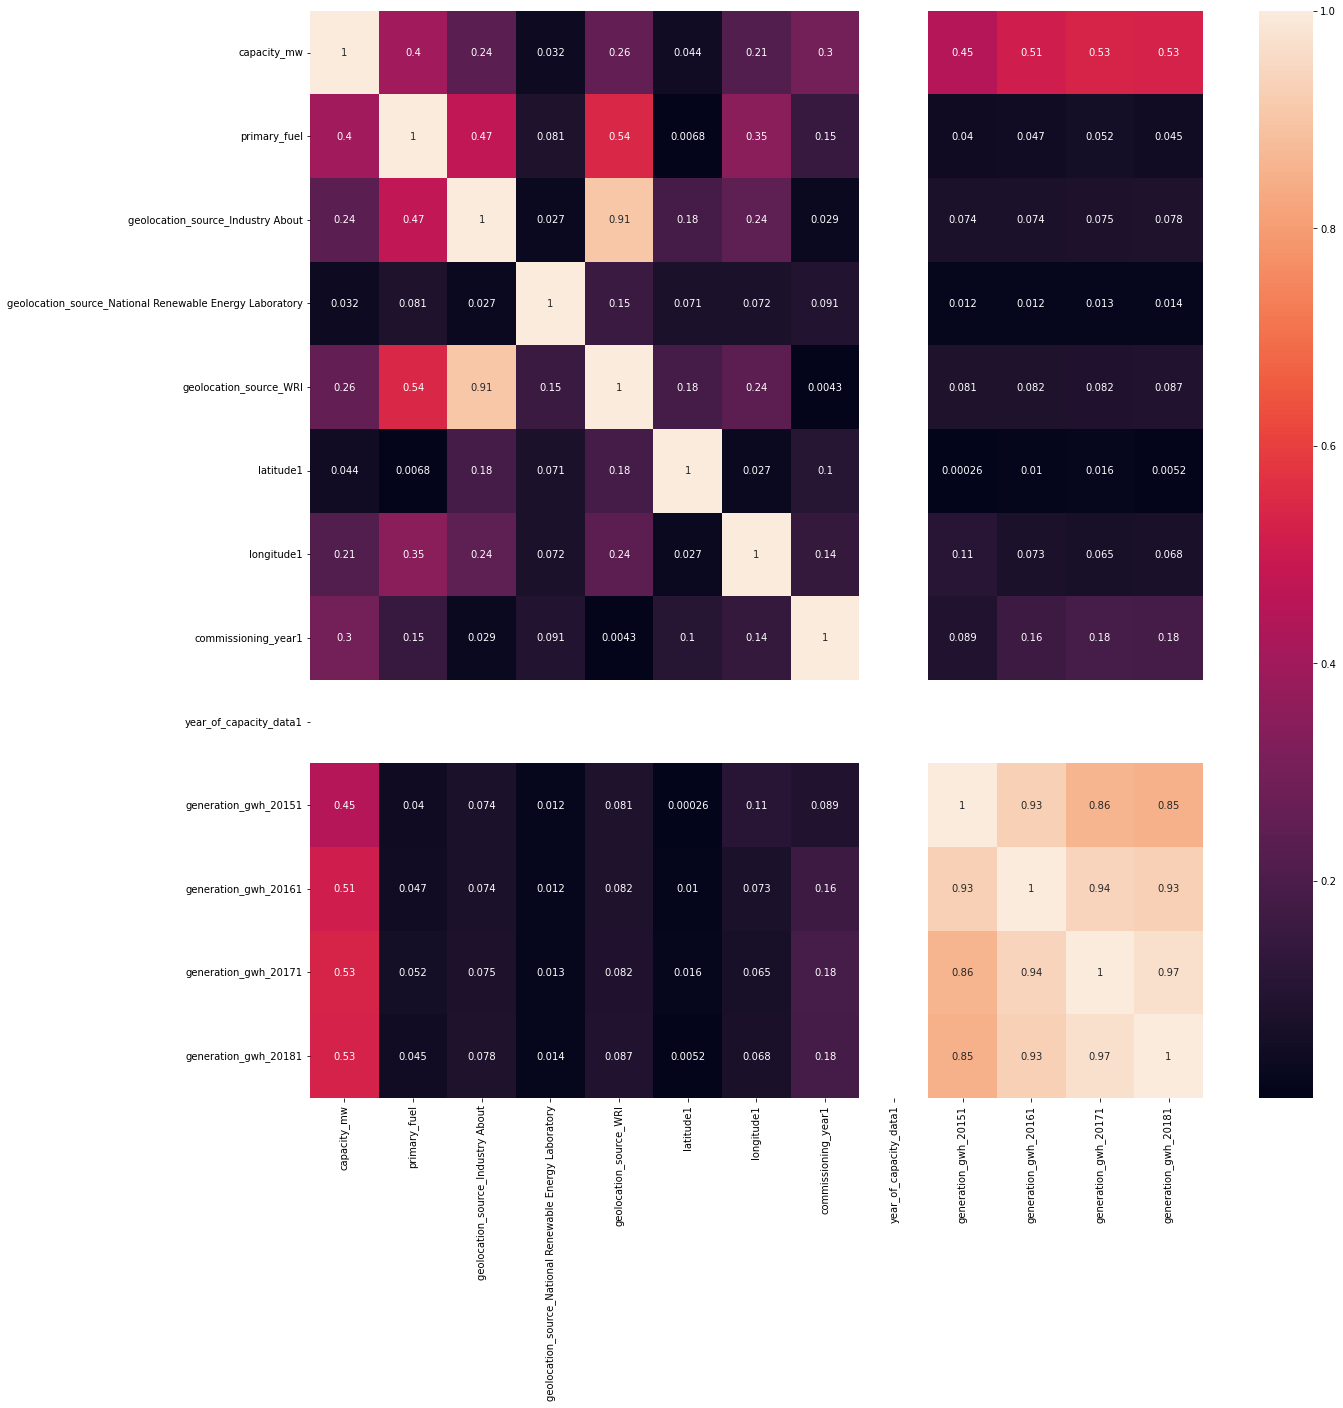

In [31]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

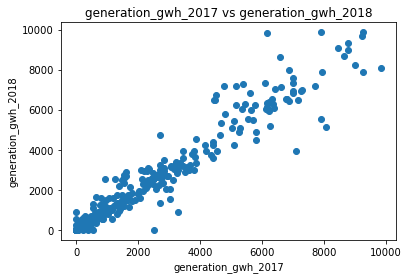

In [32]:
plt.scatter(df['generation_gwh_20171'], df['generation_gwh_20181'])
plt.xlabel('generation_gwh_2017')
plt.ylabel('generation_gwh_2018')
plt.title('generation_gwh_2017 vs generation_gwh_2018')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

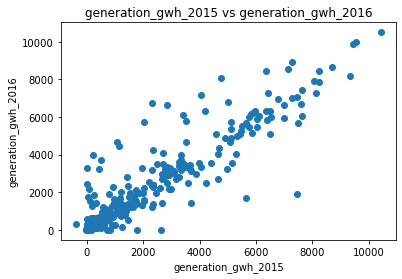

In [33]:
plt.scatter(df['generation_gwh_20151'], df['generation_gwh_20161'])
plt.xlabel('generation_gwh_2015')
plt.ylabel('generation_gwh_2016')
plt.title('generation_gwh_2015 vs generation_gwh_2016')
plt.show

I would delete this column ordinarily but since both columns are important for capacity prediction, I will not be dropping any columns

In [34]:
df.skew()

capacity_mw                                                 2.003281
primary_fuel                                                0.424020
geolocation_source_Industry About                           2.108040
geolocation_source_National Renewable Energy Laboratory    14.628621
geolocation_source_WRI                                     -1.827864
latitude1                                                  -0.139509
longitude1                                                  1.201778
commissioning_year1                                        -0.828953
year_of_capacity_data1                                      0.000000
generation_gwh_20151                                        1.579031
generation_gwh_20161                                        1.510207
generation_gwh_20171                                        1.367723
generation_gwh_20181                                        1.370346
dtype: float64

Now that we have removed some of the outliers, use Power Transformer to reduce skewness

In [35]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

But befor Transforming, We need to now seperate our Classification and Regression Datasets

In [36]:
x_reg = df.drop(columns = ['capacity_mw'])
y_reg = df.capacity_mw

In [37]:
x_cl = df.drop(columns = ['primary_fuel'])
y_cl = df.primary_fuel

Now, let's first try on our Regression dataset

In [38]:
x_reg

,primary_fuel,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,latitude1,longitude1,commissioning_year1,year_of_capacity_data1,generation_gwh_20151,generation_gwh_20161,generation_gwh_20171,generation_gwh_20181
0,6,0,1,0,28.1839,73.2407,2011.000000,2019.0,2300.308088,2390.478431,2501.406819,2600.044086
1,1,0,0,1,24.7663,74.6090,1997.089457,2019.0,2311.469640,2393.503765,2498.555257,2595.494542
2,7,0,0,1,21.9038,69.3732,1997.087155,2019.0,2312.333625,2393.790953,2498.056728,2595.220704
3,2,0,0,1,23.8712,91.3602,2004.000000,2019.0,843.747000,886.004428,663.774500,626.239128
4,1,0,0,1,21.9603,82.4091,2015.000000,2019.0,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1,0,0,1,16.2949,77.3568,2016.000000,2019.0,0.994875,233.596650,865.400000,686.500000
903,6,1,0,0,12.8932,78.1654,1997.090077,2019.0,2308.795984,2392.035251,2496.471872,2594.093513
904,7,0,0,1,15.2758,75.5811,1997.089200,2019.0,2309.795649,2392.526801,2496.891103,2594.394290
905,1,0,0,1,24.3500,73.7477,1997.089082,2019.0,2311.620012,2393.556039,2498.482816,2595.455765


In [39]:
y_reg

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 865, dtype: float64

In [40]:
x_reg_scaled = scaler.fit_transform(x_reg.values)
x_reg_scaled = scaler.fit_transform(x_reg_scaled)
x_reg_scaled = scaler.fit_transform(x_reg_scaled)
x_reg_scaled

array([[ 1.14852034, -0.39939633, 14.67140075, ...,  0.32480102,
         0.31973805,  0.32738699],
       [-1.00770553, -0.39939633, -0.06815982, ...,  0.32651455,
         0.31816777,  0.32494753],
       [ 1.43190116, -0.39939633, -0.06815982, ...,  0.32667718,
         0.31789319,  0.32480066],
       ...,
       [ 1.43190116, -0.39939633, -0.06815982, ...,  0.32596128,
         0.31725114,  0.3243574 ],
       [-1.00770553, -0.39939633, -0.06815982, ...,  0.32654416,
         0.31812787,  0.32492673],
       [ 1.43190116, -0.39939633, -0.06815982, ...,  0.32556947,
         0.31673471,  0.32401765]])

Now, we use PCA to perform dimension reduction for our model

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA()

In [43]:
pca.fit_transform(x_reg_scaled)

array([[ 1.59817301e+00,  2.86661564e+00,  6.81027349e+00, ...,
        -1.25565846e-03,  2.14184218e-04, -3.28071186e-19],
       [ 5.09056273e-01, -8.22457469e-01,  5.75188077e-02, ...,
         1.36591678e-02,  2.45067084e-02,  2.81504074e-18],
       [ 8.05914395e-01,  8.51549311e-01, -1.11751104e+00, ...,
         1.02055370e-02,  1.03142752e-02, -1.29752973e-18],
       ...,
       [ 5.19145015e-01,  3.92808820e-02, -1.11738778e+00, ...,
        -1.21354012e-02, -1.15621623e-02,  1.79886523e-19],
       [ 5.36799067e-01, -7.53913136e-01, -4.68928489e-02, ...,
         1.63522794e-02,  2.50181558e-02, -5.48847467e-20],
       [ 4.38652940e-01, -2.16888344e-01, -1.41533469e+00, ...,
        -1.68641941e-02, -2.22627002e-02,  4.92794097e-19]])

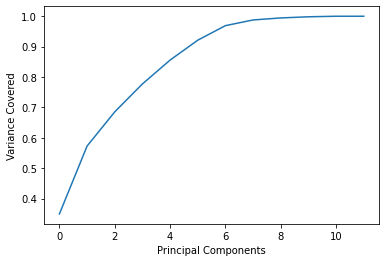

In [44]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

We can see, we only need about 7 components to cover more than 95% of variance

In [45]:
pca = PCA (n_components = 7)
new_pcomp_reg = pca.fit_transform(x_reg_scaled)
princi_comp_reg = pd.DataFrame(new_pcomp_reg, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
princi_comp_reg

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.598173,2.866616,6.810273,12.367625,-0.910938,3.834061,0.667260
1,0.509056,-0.822457,0.057519,0.071434,0.976548,-0.242491,0.653430
2,0.805914,0.851549,-1.117511,1.151838,1.016352,-1.722531,-0.781812
3,-1.869936,-0.966862,1.147578,-0.836325,-0.439006,1.058770,-0.516969
4,3.829422,-2.529329,1.249548,-0.536307,-0.618423,-0.040537,-0.316789
...,...,...,...,...,...,...,...
860,-2.258800,-0.872929,1.078359,-0.076771,-1.251732,-1.291946,0.551112
861,1.332986,2.662052,-0.366941,-0.774315,-2.182082,0.732684,0.371495
862,0.519145,0.039281,-1.117388,0.592574,-0.555962,-0.328612,-1.241598
863,0.536799,-0.753913,-0.046893,0.176970,1.007536,-0.427315,0.737656


In [46]:
princi_comp_reg.skew()

PC1   -0.014307
PC2    0.947285
PC3    1.108047
PC4    8.820183
PC5    0.190326
PC6    0.505095
PC7   -0.032626
dtype: float64

In [47]:
x_train_reg,x_test_reg,y_train_reg,y_test_reg = train_test_split(princi_comp_reg,y_reg,test_size=0.25,random_state=42)

In [48]:
lr = LinearRegression()
lr.fit(x_train_reg,y_train_reg)

LinearRegression()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
def metric_score(clf,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True):
    if train:
        y_pred_reg = clf.predict(x_train_reg)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {r2_score(y_train_reg,y_pred_reg)*100:.2f}%')
        
    elif train == False:
        pred_reg = clf.predict(x_test_reg)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {r2_score(y_test_reg,pred_reg)*100:.2f}%')
        print('Cross Validation Score = ',cross_val_score(clf,x_reg,y_reg,cv=5).mean())
        print('MAE = ',mean_absolute_error(y_test_reg,pred_reg))
        print('MSE = ',mean_squared_error(y_test_reg,pred_reg))
        print('RMSE = ',np.sqrt(mean_squared_error(y_test_reg,pred_reg)))

In [51]:
metric_score(lr,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True)
metric_score(lr,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = False)


 ======TRAINING RESULT======
Accuracy Score: 39.96%

 ======TESTING RESULT======
Accuracy Score: 41.05%
Cross Validation Score =  0.44772796839820594
MAE =  251.23192998153903
MSE =  111031.34910760455
RMSE =  333.21366884869013


We can note that we are getting training accuracy of 40% and Testing accuracy of 41% with Linear Regression model

We should now test the data on other models as well to check which model is giving us the best result

In [52]:
from sklearn.svm import SVR

In [53]:
knn = KNeighborsRegressor()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
svr = SVR()
xgb = XGBRegressor()

In [54]:
#TRAINING THE MODELS
knn.fit(x_train_reg,y_train_reg)
dec.fit(x_train_reg,y_train_reg)
ran.fit(x_train_reg,y_train_reg)
svr.fit(x_train_reg,y_train_reg)
xgb.fit(x_train_reg,y_train_reg)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training and Testing accuracies for other models

In [56]:
print(lr.score(x_train_reg,y_train_reg))
print(knn.score(x_train_reg,y_train_reg))
print(dec.score(x_train_reg,y_train_reg))
print(ran.score(x_train_reg,y_train_reg))
print(svr.score(x_train_reg,y_train_reg))
print(xgb.score(x_train_reg,y_train_reg))

0.3995697971802735
0.7616733424964222
0.9998606860981109
0.9608771528674747
-0.18369840948312444
0.9997068088356955


In [57]:
print(lr.score(x_test_reg,y_test_reg))
print(knn.score(x_test_reg,y_test_reg))
print(dec.score(x_test_reg,y_test_reg))
print(ran.score(x_test_reg,y_test_reg))
print(svr.score(x_test_reg,y_test_reg))
print(xgb.score(x_test_reg,y_test_reg))

0.41047775359378824
0.7149851672888443
0.7128610703910649
0.7679651863763298
-0.19481947738035488
0.7510914797473536


We can note, KNN and Random Forest are our best models, although there's quite a lot of overfitting in Random Forest.
Therefore, I'll be using KNN as my model of choice

Now we need to check for overfitting

In [58]:
from sklearn.linear_model import Ridge, RidgeCV

In [59]:
ridgecv = RidgeCV(alphas = np.arange(0.001,10,0.01),normalize=True)
ridgecv.fit(x_train_reg,y_train_reg)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       9.661e+00, 9.671e+00, 9.681e+00, 9.691e+00, 9.701e+00, 9.711e+00,
       9.721e+00, 9.731e+00, 9.741e+00, 9.751e+00, 9.761e+00, 9.771e+00,
       9.781e+00, 9.791e+00, 9.801e+00, 9.811e+00, 9.821e+00, 9.831e+00,
       9.841e+00, 9.851e+00, 9.861e+00, 9.871e+00, 9.881e+00, 9.891e+00,
       9.901e+00, 9.911e+00, 9.921e+00, 9.931e+00, 9.941e+00, 9.951e+00,
       9.961e+00, 9.971e+00, 9.981e+00, 9.991e+00]),
        normalize=True)

In [60]:
ridgecv.alpha_

0.011

In [61]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train_reg,y_train_reg)

Ridge(alpha=0.011)

In [62]:
ridge_model.score(x_test_reg,y_test_reg)

0.4104773635018313

We get very similar score to our R2 score, thus we can conclude, model is not overfitting.

Now, we perform Hyper Parameter Tuning on our best performing model, i.e., KNN

In [63]:
params = {'algorithm':['kd_tree','brute'],
         'leaf_size':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50],
         'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50]}

In [64]:
grid_reg = GridSearchCV(knn, param_grid = params)
grid_reg.fit(x_train_reg,y_train_reg)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 30, 50],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 30, 50]})

In [65]:
print('best parameters: ',grid_reg.best_params_)

best parameters:  {'algorithm': 'kd_tree', 'leaf_size': 9, 'n_neighbors': 14}


In [66]:
knn_grid = grid_reg.best_estimator_
knn_grid.fit(x_train_reg,y_train_reg)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=9, n_neighbors=14)

In [67]:
metric_score(knn_grid,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True)
metric_score(knn_grid,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = False)


 ======TRAINING RESULT======
Accuracy Score: 69.24%

 ======TESTING RESULT======
Accuracy Score: 71.48%
Cross Validation Score =  0.7530012499090815
MAE =  123.01749835418038
MSE =  53723.10627045335
RMSE =  231.78245462168474


In [68]:
metric_score(knn,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True)
metric_score(knn,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = False)


 ======TRAINING RESULT======
Accuracy Score: 76.17%

 ======TESTING RESULT======
Accuracy Score: 71.50%
Cross Validation Score =  0.7490511264338201
MAE =  113.00712258064517
MSE =  53680.046146710425
RMSE =  231.68954690859582


- Both default and hypertuned models are giving very similar test accuracies but default knn model shows better training accuracy albeit, a bit more overfitting.
- Both models can be used as they are quite similar.

Now, let's first try on our Classification Model

In [69]:
x_cl

,capacity_mw,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,latitude1,longitude1,commissioning_year1,year_of_capacity_data1,generation_gwh_20151,generation_gwh_20161,generation_gwh_20171,generation_gwh_20181
0,2.5,0,1,0,28.1839,73.2407,2011.000000,2019.0,2300.308088,2390.478431,2501.406819,2600.044086
1,98.0,0,0,1,24.7663,74.6090,1997.089457,2019.0,2311.469640,2393.503765,2498.555257,2595.494542
2,39.2,0,0,1,21.9038,69.3732,1997.087155,2019.0,2312.333625,2393.790953,2498.056728,2595.220704
3,135.0,0,0,1,23.8712,91.3602,2004.000000,2019.0,843.747000,886.004428,663.774500,626.239128
4,1800.0,0,0,1,21.9603,82.4091,2015.000000,2019.0,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,0,0,1,16.2949,77.3568,2016.000000,2019.0,0.994875,233.596650,865.400000,686.500000
903,3.0,1,0,0,12.8932,78.1654,1997.090077,2019.0,2308.795984,2392.035251,2496.471872,2594.093513
904,25.5,0,0,1,15.2758,75.5811,1997.089200,2019.0,2309.795649,2392.526801,2496.891103,2594.394290
905,80.0,0,0,1,24.3500,73.7477,1997.089082,2019.0,2311.620012,2393.556039,2498.482816,2595.455765


In [70]:
y_cl

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 865, dtype: int32

Use Power Transformer to reduce skewness

In [71]:
x_cl_scaled = scaler.fit_transform(x_cl.values)
x_cl_scaled = scaler.fit_transform(x_cl_scaled)
x_cl_scaled = scaler.fit_transform(x_cl_scaled)
x_cl_scaled

array([[-1.70753019, -0.39939633, 14.67140075, ...,  0.32480102,
         0.31973805,  0.32738699],
       [ 0.23642925, -0.39939633, -0.06815982, ...,  0.32651455,
         0.31816777,  0.32494753],
       [-0.26310936, -0.39939633, -0.06815982, ...,  0.32667718,
         0.31789319,  0.32480066],
       ...,
       [-0.50063892, -0.39939633, -0.06815982, ...,  0.32596128,
         0.31725114,  0.3243574 ],
       [ 0.12691846, -0.39939633, -0.06815982, ...,  0.32654416,
         0.31812787,  0.32492673],
       [-0.74100148, -0.39939633, -0.06815982, ...,  0.32556947,
         0.31673471,  0.32401765]])

Now, we use PCA to perform dimension reduction for our model

In [72]:
pca = PCA()

In [73]:
pca.fit_transform(x_cl_scaled)

array([[ 1.60358138e+00,  2.69811756e+00,  6.46974804e+00, ...,
        -7.01969868e-03, -8.86504973e-03,  1.07827392e-17],
       [ 5.37365886e-01, -4.65227160e-01, -5.24624279e-02, ...,
         5.65386246e-03,  1.82758359e-02, -3.62855134e-18],
       [ 7.61932890e-01,  2.90511890e-01, -8.04850476e-01, ...,
         2.03017305e-02,  1.82076187e-02,  4.98927898e-18],
       ...,
       [ 4.86191409e-01, -3.69309276e-01, -1.05124045e+00, ...,
         3.15128137e-04, -3.38094101e-03,  1.32927129e-18],
       [ 5.69313149e-01, -3.43381581e-01, -1.69119771e-01, ...,
         7.44548796e-03,  1.79313862e-02, -6.21783057e-19],
       [ 4.16013795e-01, -4.85690458e-01, -1.46582600e+00, ...,
        -4.69524450e-03, -1.49957797e-02,  2.40532196e-18]])

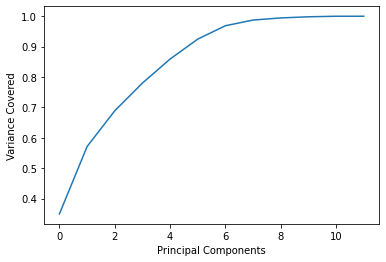

In [74]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

We can see, we only need about 7 components to cover more than 95% of variance

In [75]:
pca = PCA (n_components = 7)
new_pcomp_cl = pca.fit_transform(x_cl_scaled)
princi_comp_cl = pd.DataFrame(new_pcomp_cl, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
princi_comp_cl

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.603581,2.698118,6.469748,12.593522,-1.571347,3.762004,-0.862513
1,0.537366,-0.465227,-0.052462,0.164536,0.912428,-0.236772,-0.095196
2,0.761933,0.290512,-0.804850,0.985519,1.229579,-1.661261,-0.126582
3,-1.871210,-0.996775,0.999090,-0.857051,-0.569455,1.166115,-0.356103
4,3.799552,-2.919799,1.259011,-0.636024,-0.622413,0.000233,0.238019
...,...,...,...,...,...,...,...
860,-2.286904,-1.239109,1.235247,-0.121976,-1.148701,-1.429645,0.820447
861,1.354074,2.948351,-0.417808,-0.680203,-2.189689,0.563699,0.279166
862,0.486191,-0.369309,-1.051240,0.416660,-0.442155,-0.250300,-0.372550
863,0.569313,-0.343382,-0.169120,0.280190,0.945848,-0.428045,-0.132159


In [76]:
princi_comp_cl.skew()

PC1   -0.034818
PC2    0.909944
PC3    1.083881
PC4    9.178552
PC5    0.248700
PC6    0.457577
PC7    0.121792
dtype: float64

In [77]:
x_train_cl,x_test_cl,y_train_cl,y_test_cl = train_test_split(princi_comp_cl,y_cl,test_size=0.25,random_state=42)

In [78]:
ranc = RandomForestClassifier()
ranc.fit(x_train_cl,y_train_cl)

RandomForestClassifier()

In [79]:
def metric_score_cl(clf,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True):
    if train:
        y_pred_cl = clf.predict(x_train_cl)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train_cl,y_pred_cl)*100:.2f}%')
        
    elif train == False:
        pred_cl = clf.predict(x_test_cl)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test_cl,pred_cl)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test_cl,pred_cl,digits =2))

In [80]:
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 100.00%

 ======TESTING RESULT======
Accuracy Score: 78.34%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.76      0.78      0.77        60
           2       0.62      0.47      0.53        17
           3       0.83      0.77      0.80        57
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        30
           7       0.75      0.86      0.80        35

    accuracy                           0.78       217
   macro avg       0.58      0.60      0.59       217
weighted avg       0.77      0.78      0.78       217



In [81]:
pred_cl = ranc.predict(x_test_cl)

In [82]:
conf_matrix = confusion_matrix(y_test_cl,pred_cl)
conf_matrix

array([[11,  0,  0,  0,  0,  0,  0,  1],
       [ 1, 47,  3,  2,  1,  1,  0,  5],
       [ 0,  6,  8,  2,  0,  1,  0,  0],
       [ 0,  8,  1, 44,  0,  0,  0,  4],
       [ 0,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0],
       [ 4,  0,  0,  1,  0,  0,  0, 30]], dtype=int64)

We can note that we are getting training accuracy of 100% and Testing accuracy of 78.34% with Random Forest model

We should now test the data on other models as well to check which model is giving us the best result

In [83]:
from sklearn.svm import SVC

In [84]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()

In [85]:
#TRAINING THE MODELS
knn.fit(x_train_cl,y_train_cl)
dec.fit(x_train_cl,y_train_cl)
svc.fit(x_train_cl,y_train_cl)
xgb.fit(x_train_cl,y_train_cl)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

Check Training and Testing Accuracies for other models:

In [86]:
print(svc.score(x_train_cl,y_train_cl))
print(knn.score(x_train_cl,y_train_cl))
print(dec.score(x_train_cl,y_train_cl))
print(ranc.score(x_train_cl,y_train_cl))
print(xgb.score(x_train_cl,y_train_cl))

0.7422839506172839
0.8317901234567902
1.0
1.0
1.0


In [87]:
print(svc.score(x_test_cl,y_test_cl))
print(knn.score(x_test_cl,y_test_cl))
print(dec.score(x_test_cl,y_test_cl))
print(ranc.score(x_test_cl,y_test_cl))
print(xgb.score(x_test_cl,y_test_cl))

0.6820276497695853
0.7235023041474654
0.7188940092165899
0.783410138248848
0.7511520737327189


Cannot check AUC-ROC Curve as this is a 8 Class data 

We can note, KNN and Random Forest is again our best performing model

Now, we perform Hyper Parameter Tuning on our best performing models, i.e., KNN and Random Forest

In [97]:
params = {'n_estimators':[2,10,20,30,40,50],
         'max_depth':[2,10,20,30,40,50],
         'min_samples_split':[2,10,20,30,40,50],
         'min_samples_leaf':[2,10,20,30,40,50]}

In [98]:
grid_cl = GridSearchCV(ranc, param_grid = params, n_jobs = -1)
grid_cl.fit(x_train_cl,y_train_cl)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 10, 20, 30, 40, 50],
                         'n_estimators': [2, 10, 20, 30, 40, 50]})

In [99]:
print('best parameters: ',grid_cl.best_params_)

best parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}


In [100]:
ranc_grid = grid_cl.best_estimator_
ranc_grid.fit(x_train_cl,y_train_cl)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=20)

In [101]:
params_knn = {'algorithm':['kd_tree','brute'],
         'leaf_size':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50],
         'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50]}

In [102]:
grid_cl_knn = GridSearchCV(knn, param_grid = params_knn)
grid_cl_knn.fit(x_train_cl,y_train_cl)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 30, 50],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 30, 50]})

In [103]:
print('best parameters: ',grid_cl_knn.best_params_)

best parameters:  {'algorithm': 'kd_tree', 'leaf_size': 2, 'n_neighbors': 3}


In [104]:
knn_cl_grid = grid_cl_knn.best_estimator_
knn_cl_grid.fit(x_train_cl,y_train_cl)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=2, n_neighbors=3)

In [105]:
metric_score_cl(ranc_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(ranc_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 96.60%

 ======TESTING RESULT======
Accuracy Score: 76.50%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.73      0.78      0.76        60
           2       0.53      0.53      0.53        17
           3       0.82      0.74      0.78        57
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       1.00      0.97      0.98        30
           7       0.71      0.83      0.76        35

    accuracy                           0.76       217
   macro avg       0.56      0.58      0.57       217
weighted avg       0.75      0.76      0.76       217



In [106]:
metric_score_cl(knn_cl_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(knn_cl_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 87.65%

 ======TESTING RESULT======
Accuracy Score: 74.65%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.43      0.75      0.55        12
           1       0.69      0.78      0.73        60
           2       0.50      0.47      0.48        17
           3       0.85      0.70      0.77        57
           4       1.00      0.50      0.67         2
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00        30
           7       0.81      0.71      0.76        35

    accuracy                           0.75       217
   macro avg       0.74      0.68      0.69       217
weighted avg       0.77      0.75      0.75       217



- We can clearly see, Our Hypertuned KNN model is our best fit model as it is giving us decent accuarcy while not overfitting a lot.
- Therefore save this model and knn hypertuned will be my model of choice.